In [8]:
import utils
from utils import *

In [7]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\lucas\\DataScience\\l3stockmdl\\utils.py'>

In [3]:
#df, meta_data = get_data('PETR4.SA.SAO')
#print(meta_data)
df = pd.read_csv('PETR4_2024-06-28.csv')

In [4]:
df = stock_feature_prep(df)

In [9]:
lgbm, best_params, best_score, y_pred, y_test = modeling(df)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, rmse

(0.05836790351226262, 0.4346351040563745)

In [12]:
df['predicted'] = lgbm.predict(df[col in df.columns.to_list() if col not in utils.not_modeling_variables], axis=1)

KeyError: "[('date', 'stock', 'date_refreshed', 'dif', 'target', 'open', 'high', 'low', 'close', 'volume')] not found in axis"

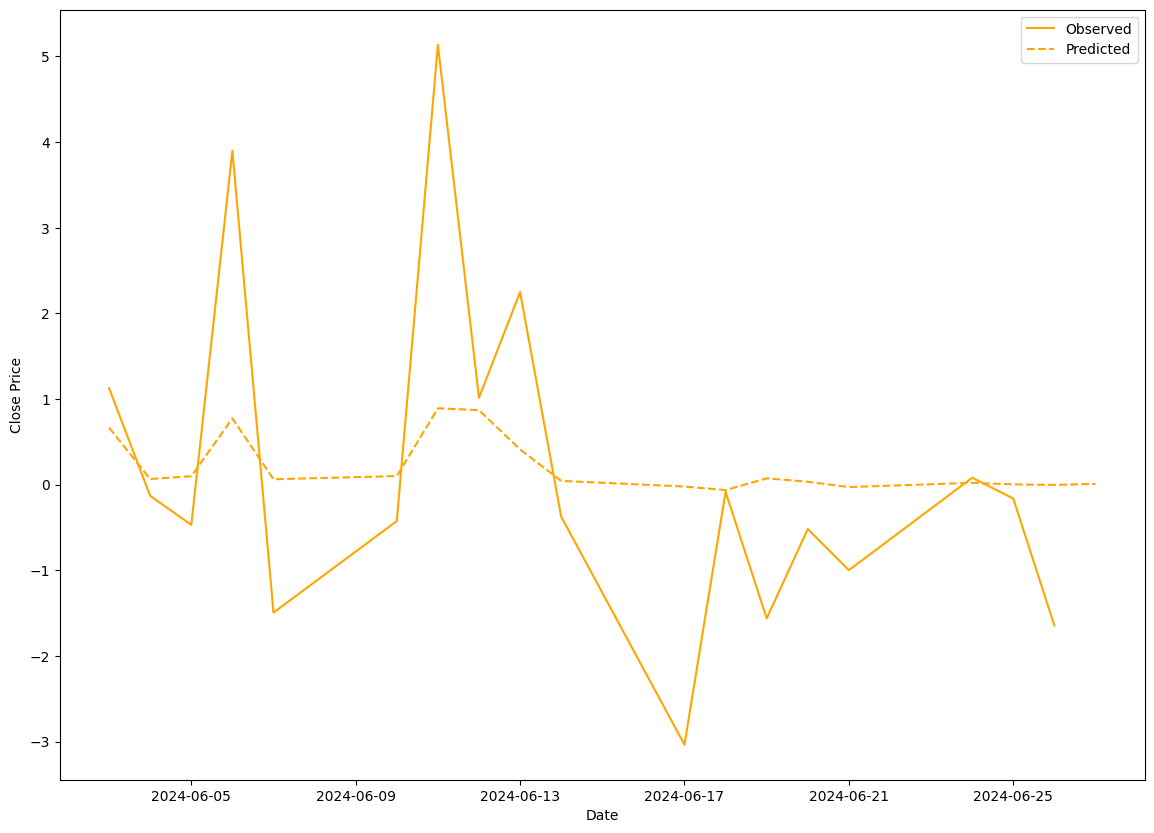

In [ ]:
df.sort_values('date', inplace=True)
temp = df[df['date'] > '2024-06-01']

# Plot stock close price per day
# Set the figure size - 10x6 inches
plt.figure(figsize=(14, 10))
plt.plot(temp['date'], temp['dif'], color='orange', label='Observed')
plt.plot(temp['date'], temp['predicted'], color='orange', linestyle='--', label='Predicted')


# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()

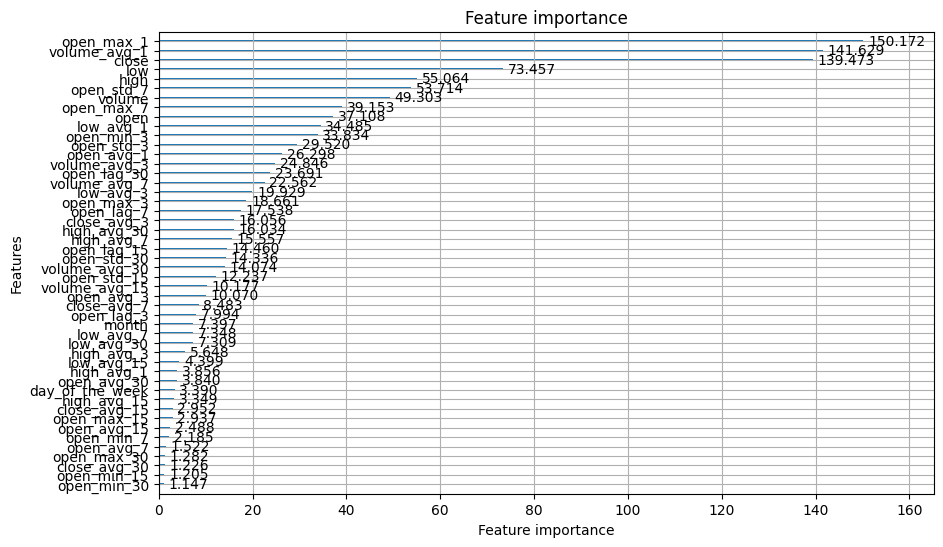

In [ ]:


# Assuming you have a trained LightGBM model named 'lgbm'
lgb.plot_importance(lgbm, importance_type='gain', figsize=(10, 6))
plt.show()